In [1]:
import speech_recognition as sr
from nltk.tokenize import word_tokenize
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Speech Recognition

In [2]:
r = sr.Recognizer()

def recognize_speech():
    with sr.Microphone() as source:
        print("Speak something...")
        audio = r.listen(source)

        try:
            text = r.recognize_google(audio)
            print("You said:", text)
            
            tokens = word_tokenize(text)
            #print("Tokens:", tokens)
            
        except sr.UnknownValueError:
            print("Sorry, I could not understand your speech.")
        except sr.RequestError as e:
            print("Error occurred; {0}".format(e))
        
    return tokens

tokens = recognize_speech()

Speak something...
You said: sine wave 100 words


Generating our query

In [3]:
#print(tokens[:-2])

query = '_'.join(tokens[:-2])
query1 = query.capitalize()
web_url = "https://en.wikipedia.org/wiki/"+query1

print(web_url)

https://en.wikipedia.org/wiki/Sine_wave


Scraper Function

In [4]:
def scrape_website(web_url):
    req_results = requests.get(web_url)
    wiki_page = BeautifulSoup(req_results.text, "html.parser")
    #print(wiki_page.prettify())
    
    if req_results.status_code == 200:
        para = wiki_page.find("p").get_text()
        print(para)
        return para
    
    else:
        print("Error 404")

Sample Rate Extraction

In [5]:
sample_rate = tokens[2]

Wave Generation Functions

In [6]:
def sine_wave(sample):
    sample_rate = sample # Hz
    duration = 1.0  # seconds
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the sine wave
    frequency = 2 # Hz
    amplitude = 1.0
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)
    
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, sine_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Sine Wave at {sample_rate} Hz Sampling')

    zoom_start = 0  # seconds
    zoom_end = 1  # seconds
    plt.xlim(zoom_start, zoom_end)
    plt.ylim(-2, 2)
    #plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    #plt.show()
    
    return fig
    
def square_wave(sample):
    sample_rate = sample  # Hz
    duration = 1.0  # seconds
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the square wave
    frequency = 3  # Hz
    amplitude = 1
    duty_cycle = 0.1  # Percentage of each period that the signal is "on"
    square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency * t) - duty_cycle)

# Plot the square wave
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, square_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Square Wave at {sample} Hz Sampling')
    plt.axhline(y=0, color='k')
    plt.ylim(-2, 2)
    #plt.show()
    
    return fig

def triangle_wave(sample):
    sample_rate = 44100  # Hz
    duration = 1.0  # seconds
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the triangle wave
    frequency = 4  # Hz
    amplitude = 1
    triangle_wave = amplitude * np.abs(np.mod(t * frequency, 1) - 0.5) * 4 - 1.0

# Plot the triangle wave
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, triangle_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Triangle Wave at {sample} Hz Sampling')
    plt.axhline(y=0, color='k')
    plt.ylim(-2, 2)
    #plt.show()
    
    return fig

def saw_wave(sample):
    sample_rate = 44100  # Hz
    duration = 1.0  # seconds
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the sawtooth wave
    frequency = 5  # Hz
    amplitude = 1
    sawtooth_wave = amplitude * (2 * (np.mod(t * frequency, 1) - 0.5))

# Plot the sawtooth wave
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, sawtooth_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Sawtooth Wave at {sample} Hz Sampling')
    plt.axhline(y=0, color='k')
    plt.ylim(-2, 2)
    #plt.show()
    
    return fig

Output Function

In [7]:
def output(tokens,web_url,sample_rate):
    
    if tokens[0] == 'sine':
        return sine_wave(int(sample_rate))
        #scrape_website(web_url), sine_wave(int(sample_rate))
    elif tokens[0] == 'square':
        return square_wave(int(sample_rate))
        #scrape_website(web_url), square_wave(int(sample_rate))
    elif tokens[0] == 'triangle':
        return triangle_wave(int(sample_rate))
        #scrape_website(web_url), triangle_wave(int(sample_rate))
    elif tokens[0] == 'sawtooth':
        return saw_wave(int(sample_rate))
        #scrape_website(web_url), saw_wave(int(sample_rate))

A sine wave, sinusoidal wave, or just sinusoid is a mathematical curve defined in terms of the sine trigonometric function, of which it is the graph.[1] It is a type of continuous wave and also a smooth periodic function.[2] It occurs often in mathematics, as well as in physics, engineering, signal processing and many other fields. 



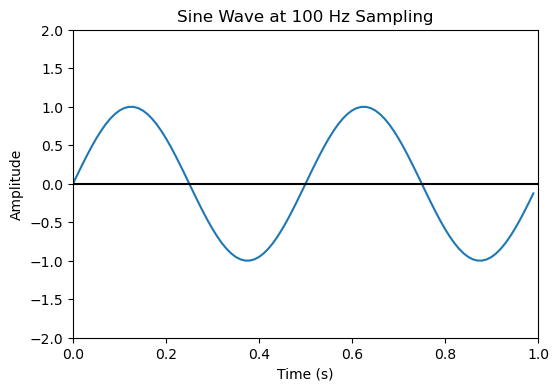

In [8]:
figure = output(tokens,web_url,sample_rate)
par = scrape_website(web_url)

Graphical User Interface Function

In [9]:
def gui_out(sample,tokens,figure,par):
    sample_rate = int(sample)  # Hz
    duration = 2.0  # seconds
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

    # Generate the waves
    frequency = 220  # Hz
    amplitude = 0.15
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)
    triangle_wave = amplitude * np.abs(np.mod(t * frequency, 1) - 0.5) * 4 - 1.0
    sawtooth_wave = amplitude * (2 * (np.mod(t * frequency, 1) - 0.5))
    duty_cycle = 0.1
    square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency * t) - duty_cycle)

    # Create a function to play the sound
    def play_sound_sine():
        sd.play(sine_wave, sample_rate)

    def play_sound_square():
        sd.play(square_wave, sample_rate)
        
    def play_sound_triangle():
        sd.play(triangle_wave, sample_rate)
        
    def play_sound_saw():
        sd.play(sawtooth_wave, sample_rate)

    # Create the GUI window
    window = tk.Tk()

    # Create a button to play the sound
    if tokens[0] == 'sine':
        canvas = FigureCanvasTkAgg(figure, master=window)
        canvas.draw()
        canvas.get_tk_widget().pack()
        info = tk.Label(window, text=par)
        info.pack()
        play_button = tk.Button(window, text="Play Sound", command=play_sound_sine)
        play_button.pack()
        # Run the GUI event loop
        window.mainloop()
        
    elif tokens[0] == 'square':
        canvas = FigureCanvasTkAgg(figure, master=window)
        canvas.draw()
        canvas.get_tk_widget().pack()
        info = tk.Label(window, text=par)
        info.pack()
        play_button = tk.Button(window, text="Play Sound", command=play_sound_square)
        play_button.pack()
        # Run the GUI event loop
        window.mainloop()
    
    elif tokens[0] == 'triangle':
        canvas = FigureCanvasTkAgg(figure, master=window)
        canvas.draw()
        canvas.get_tk_widget().pack()
        info = tk.Label(window, text=par)
        info.pack()
        play_button = tk.Button(window, text="Play Sound", command=play_sound_triangle)
        play_button.pack()
        # Run the GUI event loop
        window.mainloop()
        
    elif tokens[0] == 'sawtooth':
        canvas = FigureCanvasTkAgg(figure, master=window)
        canvas.draw()
        canvas.get_tk_widget().pack()
        info = tk.Label(window, text=par)
        info.pack()
        play_button = tk.Button(window, text="Play Sound", command=play_sound_saw)
        play_button.pack()
        # Run the GUI event loop
        window.mainloop()

In [10]:
gui_out(sample_rate,tokens,figure,par)

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Owner\AppData\Local\Temp\ipykernel_14044\3342197606.py", line 17, in play_sound_sine
    sd.play(sine_wave, sample_rate)
  File "C:\Users\Owner\anaconda3\lib\site-packages\sounddevice.py", line 175, in play
    ctx.start_stream(OutputStream, samplerate, ctx.output_channels,
  File "C:\Users\Owner\anaconda3\lib\site-packages\sounddevice.py", line 2582, in start_stream
    self.stream = StreamClass(samplerate=samplerate,
  File "C:\Users\Owner\anaconda3\lib\site-packages\sounddevice.py", line 1494, in __init__
    _StreamBase.__init__(self, kind='output', wrap_callback='array',
  File "C:\Users\Owner\anaconda3\lib\site-packages\sounddevice.py", line 898, in __init__
    _check(_lib.Pa_OpenStream(self._ptr, iparameters, oparameters,
  File "C:\Users\Owner\anaconda3\lib\site-packages\sounddevice.py", 